In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d walterconway/covid-flu-cold-symptoms

  0% 0.00/210k [00:00<?, ?B/s]
100% 210k/210k [00:00<00:00, 76.8MB/s]


In [ ]:
!unzip /content/covid-flu-cold-symptoms.zip

Archive:  /content/covid-flu-cold-symptoms.zip
  inflating: large_data.csv          


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/large_data.csv')

In [ ]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,ALLERGY


In [ ]:
df['TYPE'].unique()

array(['ALLERGY', 'COLD', 'COVID', 'FLU'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['TYPE']= label_encoder.fit_transform(df['TYPE'])

df['TYPE'].unique()

array([0, 1, 2, 3])

In [ ]:
X = df.drop('TYPE', axis=1)

y = df['TYPE']

In [ ]:
df = df.sample(frac=1)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE()

In [ ]:
X, y = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test

,0
0,2
1,1
2,3
3,1
4,0
...,...
24995,1
24996,0
24997,0
24998,1


In [ ]:
y_test = pd.get_dummies(y_test,columns=[0])

In [ ]:
y_test

,0_0,0_1,0_2,0_3
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
24995,0,0,0,1
24996,0,0,1,0
24997,1,0,0,0
24998,0,0,1,0


In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train = pd.get_dummies(y_train,columns=[0])

In [ ]:
y_train

,0_0,0_1,0_2,0_3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
74995,1,0,0,0
74996,1,0,0,0
74997,0,1,0,0
74998,0,1,0,0


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
validation_data = (X_test, y_test)

In [ ]:
result = model.fit(X_train, y_train, validation_data=validation_data, epochs=600, callbacks=[early_stop])

Epoch 1/600
2344/2344 [==============================] - 6s 2ms/step - loss: 0.2146 - accuracy: 0.9368 - val_loss: 0.1530 - val_accuracy: 0.9550
Epoch 2/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1695 - accuracy: 0.9505 - val_loss: 0.1528 - val_accuracy: 0.9550
Epoch 3/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1688 - accuracy: 0.9503 - val_loss: 0.1514 - val_accuracy: 0.9550
Epoch 4/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1674 - accuracy: 0.9503 - val_loss: 0.1526 - val_accuracy: 0.9550
Epoch 5/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1670 - accuracy: 0.9504 - val_loss: 0.1531 - val_accuracy: 0.9550
Epoch 6/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1662 - accuracy: 0.9504 - val_loss: 0.1497 - val_accuracy: 0.9550
Epoch 7/600
2344/2344 [==============================] - 5s 2ms/step - loss: 0.1654 - accuracy: 0.9505 - val_loss: 0.1510 - val_ac

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.214596,0.936813,0.152979,0.95500
1,0.169459,0.950480,0.152770,0.95500
2,0.168767,0.950307,0.151384,0.95500
3,0.167373,0.950320,0.152559,0.95500
4,0.167006,0.950413,0.153052,0.95500
5,0.166219,0.950373,0.149656,0.95500
6,0.165415,0.950493,0.151017,0.95500
7,0.164956,0.950733,0.150346,0.95500
8,0.164577,0.950640,0.149714,0.95500
9,0.166099,0.950613,0.148313,0.95500


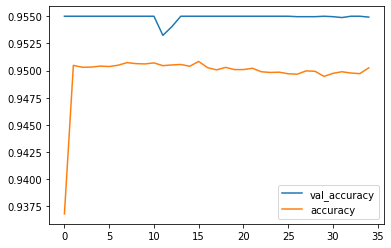

In [ ]:
losses[['val_accuracy', 'accuracy']].plot()

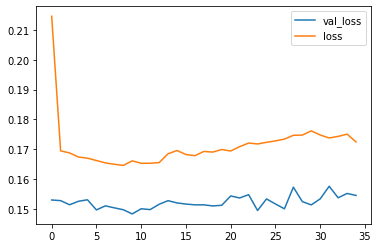

In [ ]:
losses[['val_loss', 'loss']].plot()

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions = np.argmax(preds, axis=1)

In [ ]:
predictions_df = pd.DataFrame(predictions)

In [ ]:
predictions_df = pd.get_dummies(predictions_df, columns=[0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test

,0_0,0_1,0_2,0_3
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
24995,0,0,0,1
24996,0,0,1,0
24997,1,0,0,0
24998,0,0,1,0


In [ ]:
print(classification_report(y_test, predictions_df))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6250
           1       0.91      0.98      0.94      6250
           2       0.91      0.96      0.93      6250
           3       1.00      0.91      0.95      6250

   micro avg       0.95      0.95      0.95     25000
   macro avg       0.96      0.95      0.95     25000
weighted avg       0.96      0.95      0.95     25000
 samples avg       0.95      0.95      0.95     25000



In [ ]:
print(classification_report(y_test, predictions_df))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6250
           1       0.90      1.00      0.95      6250
           2       0.93      0.95      0.94      6250
           3       1.00      0.91      0.95      6250

   micro avg       0.95      0.95      0.95     25000
   macro avg       0.96      0.95      0.96     25000
weighted avg       0.96      0.95      0.96     25000
 samples avg       0.95      0.95      0.95     25000

